In [ ]:
!pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

In [4]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d radheshyamkollipara/bank-customer-churn
!unzip bank-customer-churn.zip

100% 307k/307k [00:00<00:00, 887kB/s]
100% 307k/307k [00:00<00:00, 885kB/s]
Archive:  bank-customer-churn.zip
  inflating: Customer-Churn-Records.csv  


In [5]:
data=pd.read_csv('Customer-Churn-Records.csv')
data.head()
data.info()
# data.isnull().sum() #no null values
# data.columns
data.Geography.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

array(['France', 'Spain', 'Germany'], dtype=object)

In [52]:
data.rename(columns = {'Satisfaction Score': 'Satisfaction_Score'}, inplace = True)
data.rename(columns = {'Card Type': 'Card_Type'}, inplace = True)
data.rename(columns = {'Point Earned': 'Point_Earned'}, inplace = True)
# Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
#        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
#        'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
#        'Satisfaction Score', 'Card Type', 'Point Earned'],
#       dtype='object')
data.Card_Type.unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

1.

H0: Null Hypothesis: Tenure of customer is irrelevant to customer churning 

HA: Alternate Hypothesis: Tenure effects customer churn probability

Level of significance=5%(0.05)


Visualizing the correlation

<ipython-input-17-4e5eb105ec9c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tenure_exited,color='green',hist=False)
<ipython-input-17-4e5eb105ec9c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tenure_stayed,color='red',hist=False)


<Axes: xlabel='Tenure', ylabel='Density'>

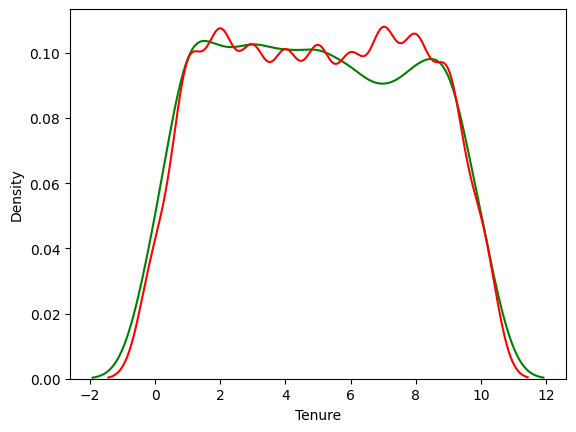

In [ ]:
exited=data.loc[data.Exited==1]
stayed=data.loc[data.Exited==0]
tenure_exited= exited.Tenure
tenure_stayed= stayed.Tenure
sns.distplot(tenure_exited,color='green',hist=False)
sns.distplot(tenure_stayed,color='red',hist=False)


Calculating the t-values and p-values

In [ ]:
print(exited.Tenure.mean())
print(stayed.Tenure.mean())
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(exited.Tenure, stayed.Tenure)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no effect of tenure on bank customer churn")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is an effect of tenure on bank customer churn")

4.934739941118744
5.032780708364733
t_value1 =  -1.365570678788837 , p_value1 =  0.1721044754880606
Conclusion: since p_value 0.1721044754880606 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is an effect of tenure on bank customer churn


2.

H0: Null Hypothesis: Complaint status of customer is irrelevant to customer Satisfaction Score

HA: Alternate Hypothesis: Complaint status effects customer Satisfaction Score

Level of significance=5%(0.05)

In [ ]:
data.Complain.value_counts()

0    7956
1    2044
Name: Complain, dtype: int64

In [ ]:
df=data.sum(axis=0)
df.head()
df.iloc[0]['Complain']


IndexError: ignored

In [6]:
complaint_yes = data.loc[data.Complain==1]
print(complaint_yes)
complaint_existed = complaint_yes.Exited
complain_mean = complaint_existed.mean()

complaint_no = data.loc[data.Complain==0]
complaint_no_existed = complaint_no.Exited
complain_no_mean = complaint_no_existed.mean()

      RowNumber  CustomerId         Surname  CreditScore Geography  Gender  \
0             1    15634602        Hargrave          619    France  Female   
1             2    15647311            Hill          608     Spain  Female   
2             3    15619304            Onio          502    France  Female   
5             6    15574012             Chu          645     Spain    Male   
7             8    15656148          Obinna          376   Germany  Female   
...         ...         ...             ...          ...       ...     ...   
9984       9985    15696175  Echezonachukwu          602   Germany    Male   
9985       9986    15586914          Nepean          659    France    Male   
9991       9992    15769959     Ajuluchukwu          597    France  Female   
9997       9998    15584532             Liu          709    France  Female   
9998       9999    15682355       Sabbatini          772   Germany    Male   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiv

[Text(0.5, 1.0, 'Fig:1 Complain vs Exited')]

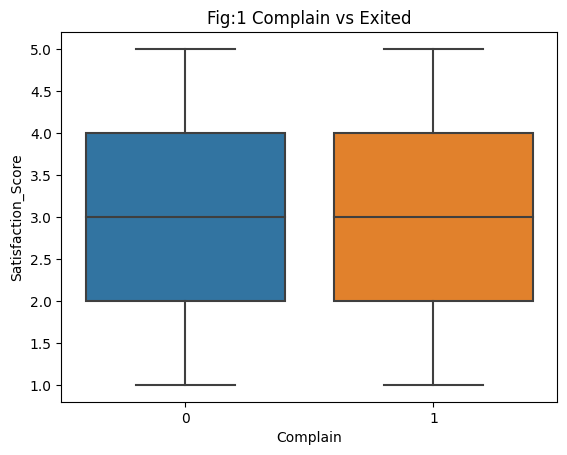

In [47]:
sns.boxplot(x=data.Complain, y=data.Satisfaction_Score, data=data).set(title="Fig:1 Complain vs Exited")

In [ ]:
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(complaint_existed, complaint_no_existed)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

if p_value2 <alpha : 
  print("Conclusion:Since p_value {} is less than alpha {} ".format (p_value_onetail,alpha) ) 
  print("Reject null hypothesis that complain status does not effect Satisfaction Score.")

else: 
  print("Conclusion:Since p value {} is greater than alpha {} ".format (p_value_onetail,alpha)) 
  print("Failed to reject null hypothesis that complain status does not effect Satisfaction Score.")

t_value = 1073.7975930429425 , p_value =0.0 , p_value_onetail = 0.0
Conclusion:Since p_value 0.0 is less than alpha 0.05 
Reject null hypothesis that complain status does not effect Churning.


3.

H0: Null Hypothesis: Geography of customer is irrelevant to customer credit score

HA: Alternate Hypothesis: Geography effects customer credit score

Level of significance=5%(0.05)

In [41]:
female=data.loc[data.Gender=="Female"]
male=data.loc[data.Gender=="Male"]
# female_geography=female.loc[female['Geography']==['Spain', 'Germany', 'France']]
# male_geography=male.loc[male['Geography']==['Spain', 'Germany', 'France']]
female.groupby([female.Geography]).mean().Exited
male.groupby([male.Geography]).mean().Exited
female.head()

<ipython-input-41-4d24b8d4ace4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  female.groupby([female.Geography]).mean().Exited
<ipython-input-41-4d24b8d4ace4>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  male.groupby([male.Geography]).mean().Exited


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


<Axes: xlabel='Geography', ylabel='CreditScore'>

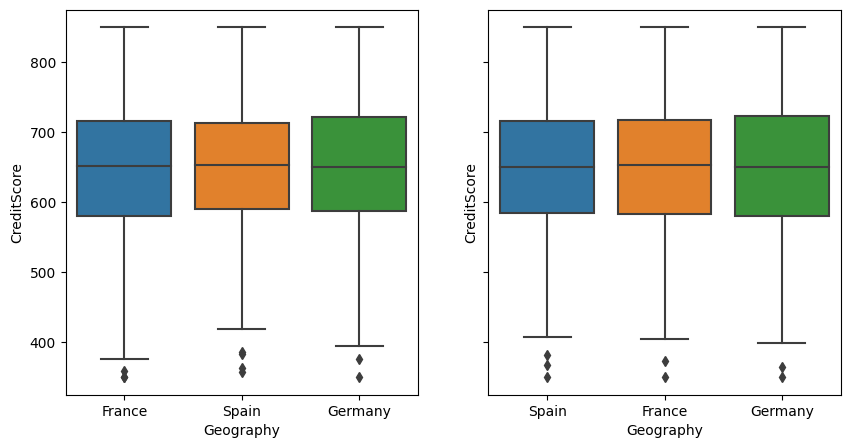

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.boxplot(ax=axes[0], data=female, x='Geography', y='CreditScore')
sns.boxplot(ax=axes[1], data=male, x='Geography', y='CreditScore')


In [48]:
formula = 'CreditScore ~ C(Geography)'
model = ols(formula, female).fit()
aov_table = anova_lm(model)
aov_table  #p-value is 0.715858 and it is greater than the alpha (0.05), therefore we fail to reject the null hypothesis.


,df,sum_sq,mean_sq,F,PR(>F)
C(Geography),2.0,1.318823e+04,6594.114669,0.703822,0.494745
Residual,4540.0,4.253532e+07,9369.012911,NaN,NaN


4.

H0: Null Hypothesis: Tenure of customer is irrelevant to customer churning

HA: Alternate Hypothesis: Tenure effects customer churning

Level of significance=5%(0.05)

<Axes: xlabel='Tenure'>

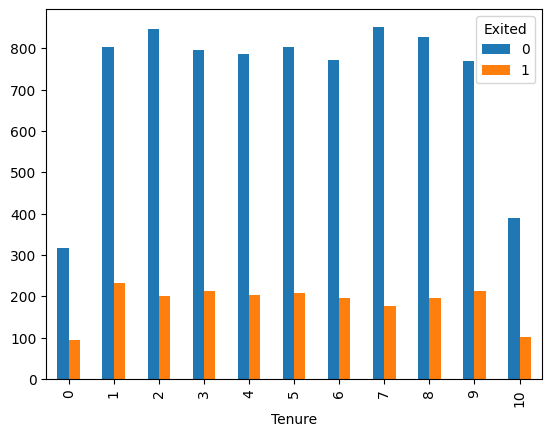

In [54]:
tenure= pd.crosstab(data.Tenure, data.Exited)
tenure.plot(kind='bar')

In [56]:
chi2, p_val, dof, exp_freq = chi2_contingency(tenure, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

if (p_val < 0.05): 
  print('Reject the null hypothesis, that the Tenure of customer is irrelevant to customer churning') 
else: 
  print('Accept the null hypothesis, that the Tenure of customer is irrelevant to customer churning')

chi-square statistic: 14.058258798510963 , p_value: 0.17035079254617927 , degree of freedom: 10 ,expected frequencies: [[328.8306  84.1694]
 [824.067  210.933 ]
 [834.4176 213.5824]
 [803.3658 205.6342]
 [787.4418 201.5582]
 [805.7544 206.2456]
 [769.9254 197.0746]
 [818.4936 209.5064]
 [816.105  208.895 ]
 [783.4608 200.5392]
 [390.138   99.862 ]] 
Accept the null hypothesis, that the Tenure of customer is irrelevant to customer churning
